In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uplode csv file
df=pd.read_csv('salaries.csv')

In [3]:
#Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   salary              73148 non-null  int64 
 5   salary_currency     73148 non-null  object
 6   salary_in_usd       73148 non-null  int64 
 7   employee_residence  73148 non-null  object
 8   remote_ratio        73148 non-null  int64 
 9   company_location    73148 non-null  object
 10  company_size        73148 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


In [4]:
#check null values
df.isnull().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
#check dupicates
df.duplicated().sum()

np.int64(39124)

In [6]:
#view duplicated rows
duplicates = df[df.duplicated(keep='first')]
duplicates

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
87,2025,EN,FT,Data Analyst,25000,GBP,31645,GB,0,GB,M
124,2025,SE,FT,Data Team Lead,173900,USD,173900,US,0,US,M
125,2025,SE,FT,Data Team Lead,82300,USD,82300,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
72851,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
72936,2021,MI,FT,Data Scientist,150000,USD,150000,US,100,US,M
72990,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
73070,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S


In [7]:
#drop duplicates
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
#view first 5 rows as default
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M
5,2025,SE,FT,Engineer,106000,USD,106000,US,0,US,M
6,2025,SE,FT,Manager,360200,USD,360200,US,0,US,M


In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

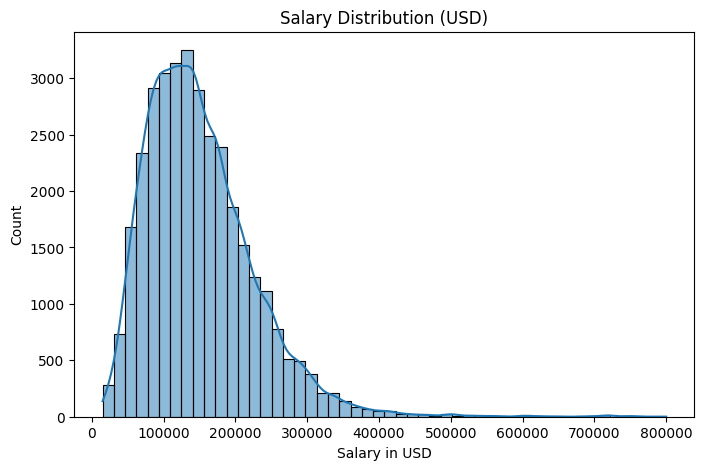

In [11]:
#Salary distribution
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Count")
plt.show()

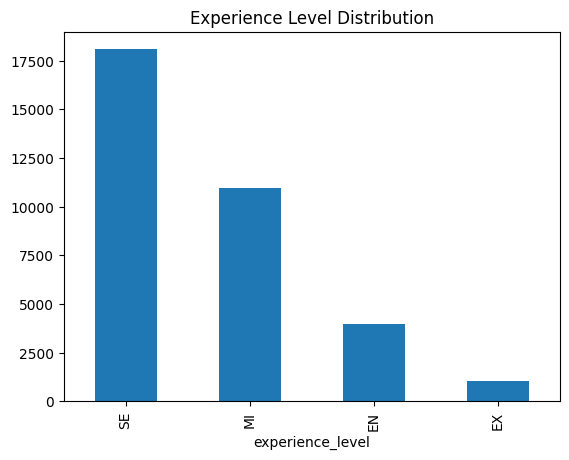

In [12]:
#Bar plot for a categorical variable experience_level
df['experience_level'].value_counts().plot.bar(title="Experience Level Distribution")
plt.show()

C:\Users\ACSASS\AppData\Local\Temp\ipykernel_6520\591240822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")


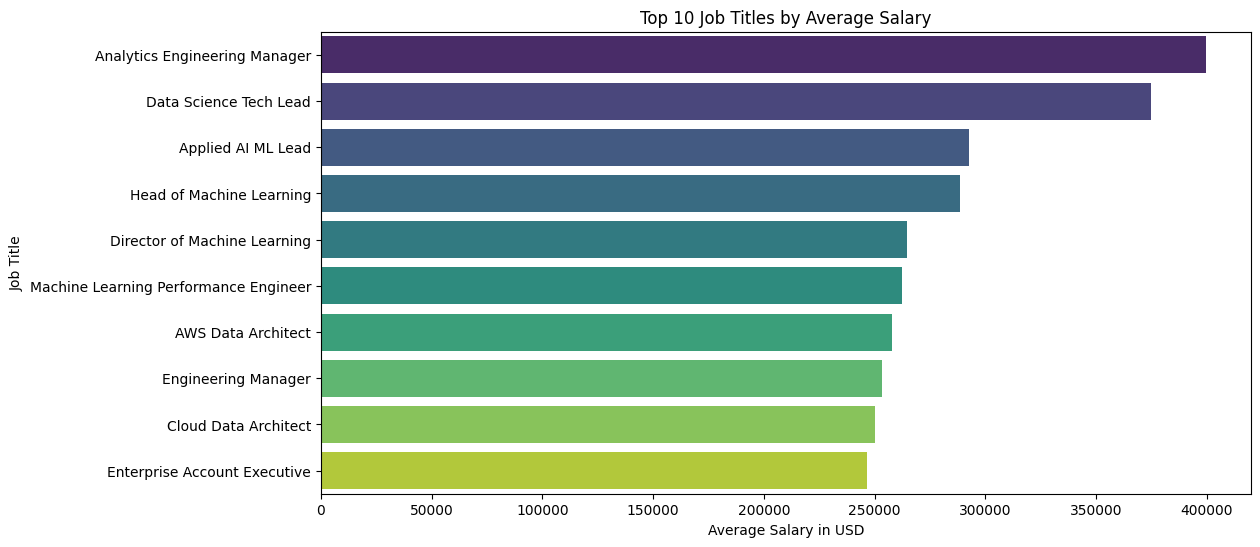

In [13]:
#Top 10 Job Titles with Highest Avg Salary
plt.figure(figsize=(12,6))
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.title("Top 10 Job Titles by Average Salary")
plt.xlabel("Average Salary in USD")
plt.ylabel("Job Title")
plt.show()

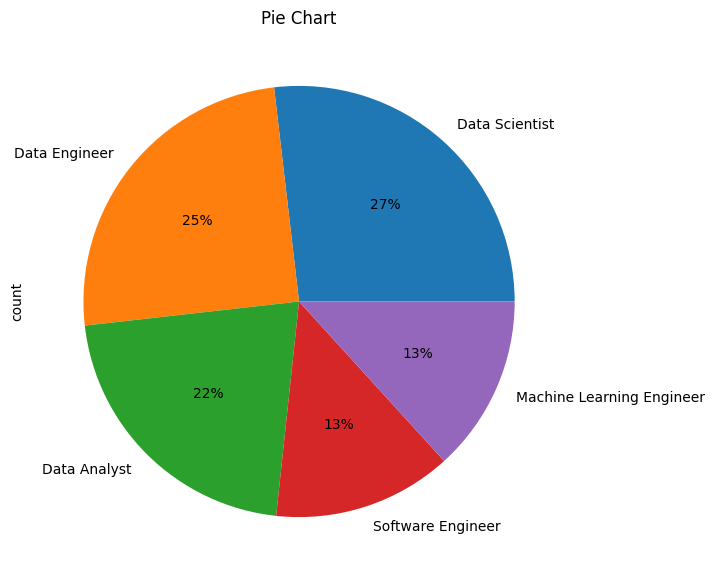

In [14]:
df["job_title"].value_counts()[:5].plot.pie(figsize = (7, 7), autopct = '%1.0f%%')
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

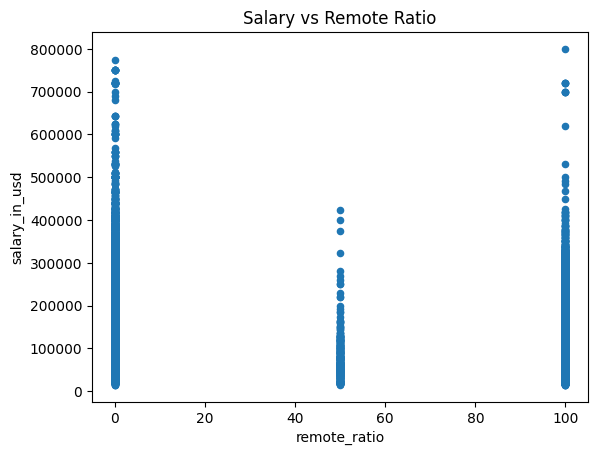

In [15]:
#salary_in_usd vs remote_ratio
df.plot.scatter(x='remote_ratio', y='salary_in_usd', title='Salary vs Remote Ratio')
plt.show()

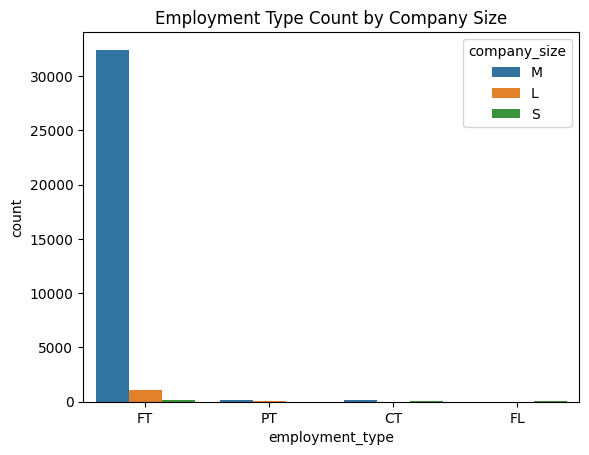

In [16]:
#employment_type vs company_size
sns.countplot(x='employment_type', hue='company_size', data=df)
plt.title("Employment Type Count by Company Size")
plt.show()

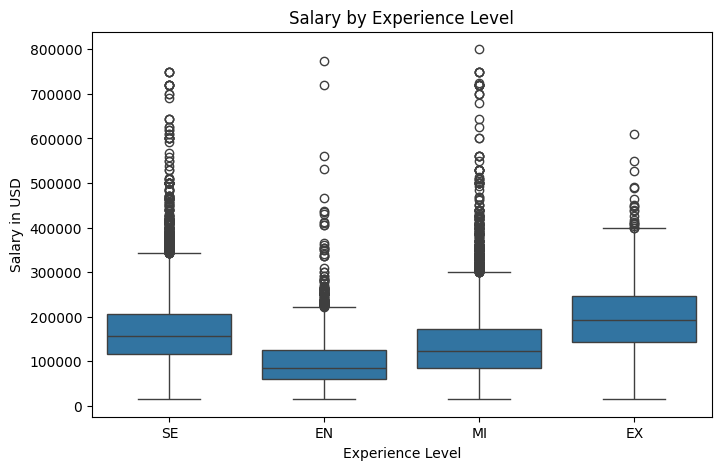

In [17]:
#Salary by Experience Level
plt.figure(figsize=(8,5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.show()

In [18]:
# Function to remove outliers in salary_in_usd within each experience_level group
def remove_outliers(df, group_col, target_col):
    def filter_iqr(group):
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Keep only rows within bounds
        return group[(group[target_col] >= lower_bound) & (group[target_col] <= upper_bound)]
    
    return df.groupby(group_col).apply(filter_iqr).reset_index(drop=True)

# Remove outliers in salary_in_usd by experience_level
df_no_outliers = remove_outliers(df, 'experience_level', 'salary_in_usd')

C:\Users\ACSASS\AppData\Local\Temp\ipykernel_6520\4036033688.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(filter_iqr).reset_index(drop=True)


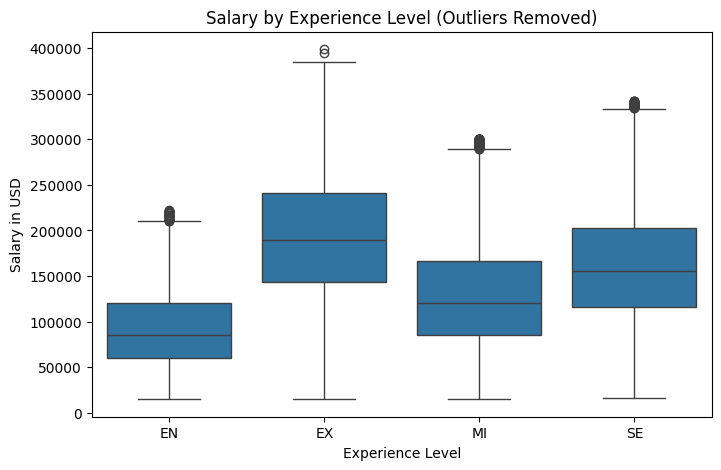

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_no_outliers)
plt.title("Salary by Experience Level (Outliers Removed)")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.show()

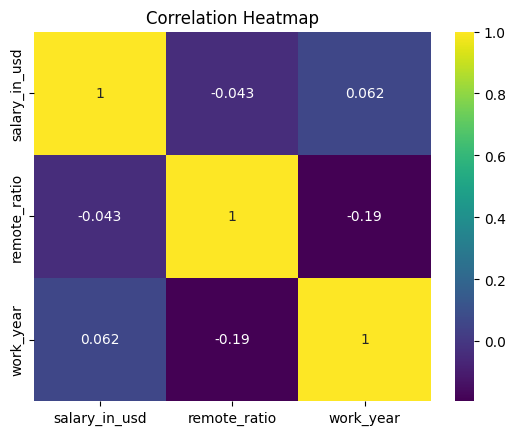

In [20]:
#Heatmap of correlation between numeric columns
numeric_cols = ['salary_in_usd', 'remote_ratio', 'work_year']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

In [21]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


In [22]:
#drop columns
df=df.drop(columns=['salary_currency', 'employee_residence', 'company_location','job_title'])

In [23]:
df.head(3)


,work_year,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size
0,2025,SE,FT,170000,170000,0,M
1,2025,SE,FT,110000,110000,0,M
4,2025,SE,FT,143000,143000,0,M


In [24]:
#ml model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables

le = LabelEncoder()
df['experience_level'] = le.fit_transform(df['experience_level'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['company_size'] = le.fit_transform(df['company_size'])


# Features & Target-
x = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(x)

print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

lr_r2 = r2_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)

print("\nLinear Regression Results")
print(" ")
print("R2 Score:", lr_r2)
print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)

Shape of X_train: (27219, 6)
Shape of X_test: (6805, 6)
Shape of y_train: (27219,)
Shape of y_test: (6805,)

Linear Regression Results
 
R2 Score: 0.12519378382502633
Mean Squared Error: 4980520762.618323
Root Mean Squared Error: 70572.80469570642


In [25]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse=mean_squared_error(y_test,y_pred_rf)
rf_rmse=np.sqrt(rf_mse)

print("\nRandom Forest Results")
print(" ")
print("R2 Score:", rf_r2)
print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)


Random Forest Results
 
R2 Score: 0.9816271928404096
Mean Squared Error: 104601620.14626125
Root Mean Squared Error: 10227.493346185136


In [26]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=None, random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

dt_r2 = r2_score(y_test, y_pred_dt)
dt_mse=mean_squared_error(y_test,y_pred_dt)
dt_rmse=np.sqrt(dt_mse)

print("\nDecision Tree Results")
print(" ")
print("R2 Score:", dt_r2)
print("Mean Squared Error:", dt_mse)
print("Root Mean Squared Error:", dt_rmse)


Decision Tree Results
 
R2 Score: 0.9744737197210898
Mean Squared Error: 145328378.52640325
Root Mean Squared Error: 12055.222043844868


In [27]:
# Decision Tree Hyperparameter Tuning
dt_params = {
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42),
                       param_grid=dt_params,cv=3,scoring='r2',n_jobs=-1,verbose=1)

dt_grid.fit(x_train, y_train)

print("\nBest Decision Tree Params:", dt_grid.best_params_)
print("Best Decision Tree R2 Score:", dt_grid.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree R2 Score: 0.9617930537604575


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Build ANN Model
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()



c:\Users\ACSASS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
# Train Model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=20,
                    batch_size=32,
                    verbose=1)
# Evaluate Model
y_pred_ann = model.predict(x_test).flatten()

mse = mean_squared_error(y_test, y_pred_ann)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ann)

print("\nANN Results")
print(" ")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Epoch 1/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 36067983360.0000 - mae: 73223.3047 - val_loss: 23011192832.0000 - val_mae: 67643.7109
Epoch 2/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 19981084672.0000 - mae: 75191.3906 - val_loss: 13943725056.0000 - val_mae: 86336.4219
Epoch 3/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 44400414720.0000 - mae: 74355.4922 - val_loss: 9025854464.0000 - val_mae: 57564.0391
Epoch 4/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 13494553600.0000 - mae: 68626.4844 - val_loss: 7074697216.0000 - val_mae: 51582.7344
Epoch 5/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 16661793792.0000 - mae: 72354.9062 - val_loss: 5727094272.0000 - val_mae: 49476.7852
Epoch 6/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 9199647744.0000 - mae: 60117.7617 - val_loss: 4986188800.0000 - val_mae: 47816.4023
Epoch 7/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 5958766592.0000 - mae: 52152.9727 - val_loss: 253597516